In [252]:
train_df = pd.read_csv('/Users/PawanKumar/Downloads/House price data/train.csv')
test_df= pd.read_csv('/Users/PawanKumar/Downloads/House price data/test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [253]:
df = train_df.copy()

In [254]:
df.shape, test_df.shape

((1460, 81), (1459, 80))

In [255]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [256]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [257]:
df['LotFrontage'].fillna(np.mean(df['LotFrontage']),inplace=True)
test_df['LotFrontage'].fillna(np.mean(test_df['LotFrontage']),inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [258]:
df['LotFrontage']=np.log(df['LotFrontage'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

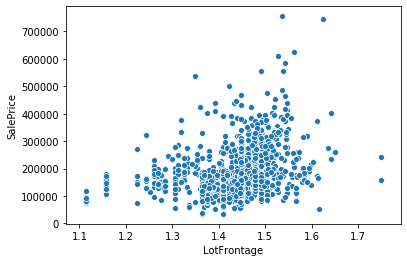

In [259]:
sns.scatterplot(np.log(df['LotFrontage']), df['SalePrice'])

<IPython.core.display.Javascript object>

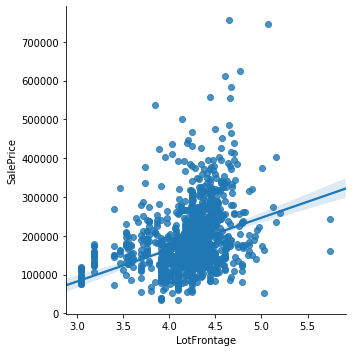

In [260]:
sns.lmplot(x = 'LotFrontage', y = 'SalePrice', data = df)

<IPython.core.display.Javascript object>

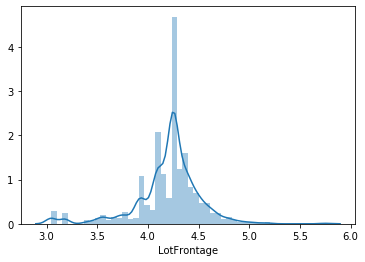

In [261]:
sns.distplot(df['LotFrontage'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

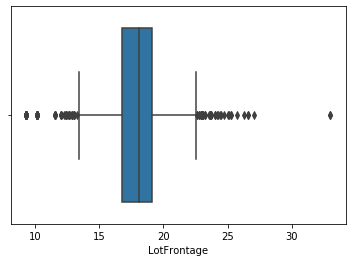

In [262]:
sns.boxplot(np.square(df['LotFrontage']))

In [263]:
from scipy import stats

In [264]:
slope, intercept,r_value, p_value, std_error =stats.linregress(df['LotFrontage'], df['SalePrice'])
print({'slope': slope, 'intercept':intercept, 'r-value':r_value, 'p-value':p_value, 'std-error':std_error})
print('R2=', np.square(r_value))

{'slope': 82101.1226950735, 'intercept': -164015.6734230093, 'r-value': 0.33147860623711867, 'p-value': 8.827577392447493e-39, 'std-error': 6119.83314149243}


<IPython.core.display.Javascript object>

R2= 0.10987806639290276


In [265]:
# So we can see that 'LotFrontage data is not that useful for house price prediction'

In [266]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()]

In [267]:
print(features_with_na)

['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [268]:
for feature in features_with_na:
    print(feature,'\t', np.round(df[feature].isna().mean(),4)*100, '%')

<IPython.core.display.Javascript object>

Alley 	 93.77 %


<IPython.core.display.Javascript object>

MasVnrType 	 0.5499999999999999 %


<IPython.core.display.Javascript object>

MasVnrArea 	 0.5499999999999999 %


<IPython.core.display.Javascript object>

BsmtQual 	 2.53 %


<IPython.core.display.Javascript object>

BsmtCond 	 2.53 %


<IPython.core.display.Javascript object>

BsmtExposure 	 2.6 %


<IPython.core.display.Javascript object>

BsmtFinType1 	 2.53 %


<IPython.core.display.Javascript object>

BsmtFinType2 	 2.6 %


<IPython.core.display.Javascript object>

Electrical 	 0.06999999999999999 %


<IPython.core.display.Javascript object>

FireplaceQu 	 47.260000000000005 %


<IPython.core.display.Javascript object>

GarageType 	 5.55 %


<IPython.core.display.Javascript object>

GarageYrBlt 	 5.55 %


<IPython.core.display.Javascript object>

GarageFinish 	 5.55 %


<IPython.core.display.Javascript object>

GarageQual 	 5.55 %


<IPython.core.display.Javascript object>

GarageCond 	 5.55 %


<IPython.core.display.Javascript object>

PoolQC 	 99.52 %


<IPython.core.display.Javascript object>

Fence 	 80.75 %


<IPython.core.display.Javascript object>

MiscFeature 	 96.3 %


In [269]:
#dropping those features which is having percentage more than 50%

In [270]:
df= df.drop(['PoolQC','Fence','Alley', 'MiscFeature'], axis =1)
test_df = test_df.drop(['PoolQC','Fence','Alley','MiscFeature'], axis =1)

In [271]:
df.shape, test_df.shape

((1460, 77), (1459, 76))

In [272]:
test_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 76, dtype: int64

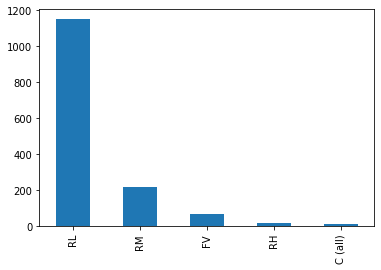

In [273]:
df['MSZoning'].value_counts().plot.bar()

<IPython.core.display.Javascript object>

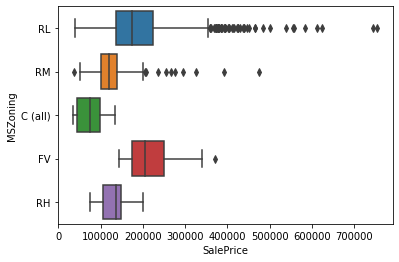

In [274]:
sns.boxplot(x=df['SalePrice'], y=df['MSZoning'])

In [275]:
test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0], inplace=True)

In [276]:
test_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 76, dtype: int64

In [277]:
cat_with_nan=['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 
              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 
              'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [278]:
df['MasVnrArea'].isna().sum()

8

In [279]:
df['MasVnrType'].fillna('Stone', inplace=True)
test_df['MasVnrType'].fillna('Stone', inplace=True)

<IPython.core.display.Javascript object>

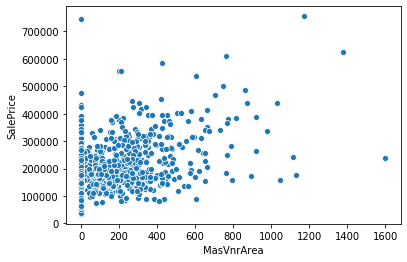

In [280]:
sns.scatterplot(df['MasVnrArea'], df['SalePrice'])

In [281]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace = True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(), inplace = True)

In [282]:
df['BsmtQual'].fillna('Unavail', inplace=True)
test_df['BsmtQual'].fillna('Unavail', inplace=True)

In [283]:
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0], inplace=True)

In [284]:
for feature in cat_with_nan:
    if feature!='GarageYrBlt':
        df[feature].fillna(df[feature].mode()[0], inplace = True)
        test_df[feature].fillna(test_df[feature].mode()[0], inplace =True)

In [285]:
[feature for feature in df.columns if df[feature].isnull().sum()]

['GarageYrBlt']

In [286]:
# plt.figure(figsize=(28,12))
# sns.heatmap(test_df.isnull(), yticklabels =False)
# plt.show()
# plt.figure(figsize=(8,6))
# sns.heatmap(df.isnull(), yticklabels =False)
# plt.show()

In [287]:
[feature for feature in df.columns if df[feature].isna().sum()]
test_nan=[feature for feature in test_df.columns if test_df[feature].isna().sum()]

In [288]:
for feature in test_nan:
    if feature!='GarageYrBlt':
#         df[feature].fillna(df[feature].mode()[0], inplace = True)
        test_df[feature].fillna(test_df[feature].mode()[0], inplace =True)

In [289]:
temp1=df[df.GarageYrBlt.isna()]

In [290]:
test_df[test_df.GarageYrBlt.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,98.0,13260,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,1,2010,Oth,Abnorml
71,1532,30,RM,56.0,4485,Pave,Reg,Lvl,AllPub,Inside,...,0,135,0,0,0,0,5,2010,WD,Normal
79,1540,190,RM,100.0,9045,Pave,Reg,Lvl,AllPub,Inside,...,18,18,0,0,0,0,6,2010,WD,Abnorml
92,1553,70,RM,60.0,12900,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,168,0,0,5,2010,WD,Normal
96,1557,190,RL,60.0,9900,Pave,Reg,Lvl,AllPub,Inside,...,0,168,0,0,0,0,2,2010,ConLD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2894,50,C (all),60.0,8520,Grvl,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,0,4,2006,WD,Normal
1449,2910,180,RM,21.0,1470,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2006,WD,Normal
1453,2914,160,RM,21.0,1526,Pave,Reg,Lvl,AllPub,Inside,...,34,0,0,0,0,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal


<IPython.core.display.Javascript object>

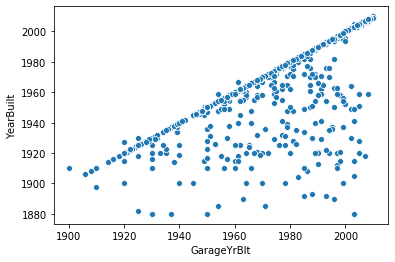

In [291]:
sns.scatterplot(temp.GarageYrBlt, temp.YearBuilt)

In [292]:
slope, intercept,r_value, p_value, std_error =stats.linregress(temp['GarageYrBlt'], temp['YearBuilt'])
print({'slope': slope, 'intercept':intercept, 'r-value':r_value, 'p-value':p_value, 'std-error':std_error})
print('R2=', np.square(r_value))

{'slope': 0.982514566517005, 'intercept': 29.04753973724746, 'r-value': 0.8256674841743422, 'p-value': 0.0, 'std-error': 0.01809117959455059}


<IPython.core.display.Javascript object>

R2= 0.6817267944227876


In [293]:
Year_col=[feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]

In [294]:
df[Year_col]
for i in Year_col:
    if i != 'GarageYrBlt':
        df[i]=df[i].astype('int32')

In [296]:
for i in Year_col:
    if i != 'YearBuilt':
        df[i]= df[i]-df['YearBuilt']

In [300]:
for i in Year_col:
    if i != 'YearBuilt':
        test_df[i]= test_df[i]-df['YearBuilt']
df[Year_col].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,0,0.0,5
1,1976,0,0.0,31
2,2001,1,0.0,7
3,1915,55,83.0,91
4,2000,0,0.0,8


In [302]:
df= df.drop(['Id','YearBuilt','GarageYrBlt'], axis=1)
test_df=test_df.drop(['Id','YearBuilt','GarageYrBlt'], axis=1)

In [303]:
test_df.shape, df.shape

((1459, 73), (1460, 74))

In [307]:
#Saving the dataset after handling the missisng values before handling the categorincal values.
df.to_csv('train_before_cat.csv', index = False)
test_df.to_csv('test_before_cat.csv', index = False)
# handling the categorical values is pending

In [2]:
train_df = pd.read_csv('train_before_cat.csv')
test_df =  pd.read_csv('test_before_cat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Handling categorical variable

In [14]:
train_categorical_feature=[feature for feature in train_df.columns if train_df[feature].dtypes =='O']
test_categorical_feature=[feature for feature in test_df.columns if test_df[feature].dtypes =='O']

In [48]:
final_df=pd.concat([test_df, train_df], axis =0, sort=False)

<IPython.core.display.Javascript object>

In [50]:
final_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,-3999.0,WD,Normal,NaN
1,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,-3918.0,WD,Normal,NaN
2,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,-3993.0,WD,Normal,NaN
3,60,RL,78.000000,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,-3735.0,WD,Normal,NaN
4,120,RL,43.000000,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,-3990.0,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,4.127134,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,8.0,WD,Normal,175000.0
1456,20,RL,4.442651,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,32.0,WD,Normal,210000.0
1457,70,RL,4.189655,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,69.0,WD,Normal,266500.0
1458,20,RL,4.219508,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,60.0,WD,Normal,142125.0


In [172]:
# defining a function to handle the categorical values
def categ_coding(df, feature_list):
    for feature in feature_list:
        df1 = pd.get_dummies(df[feature], drop_first=True)
        df = df.drop(feature, axis=1)
        df = pd.concat([df, df1], axis=1)
    return df

In [177]:
final_df=categ_coding(final_df, train_categorical_feature)

In [54]:
final_df= final_df.loc[:, ~final_df.columns.duplicated()]

In [176]:
final_df.shape

(2919, 176)

In [60]:
final_test_df=final_df[final_df['SalePrice'].isna()]
final_train_df=final_df[final_df['SalePrice'].isna()==False]

In [185]:
final_test_df=final_test_df.drop('SalePrice', axis=1)
X_train_df=final_train_df.drop('SalePrice', axis=1)
Y_train = final_train_df['SalePrice']

In [187]:
X_train_df.shape, Y_train.shape

((1460, 175), (1460,))

In [68]:
# trying Xg_boost technique

In [188]:
import xgboost

In [189]:
Regressor = xgboost.XGBRFRegressor()

In [190]:
Regressor.fit(X_train_df, Y_train)

C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:56:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [195]:
y_pred = Regressor.predict(final_test_df)

In [196]:
from sklearn import metrics

In [197]:
submission= pd.read_csv('/Users/PawanKumar/Downloads/House price data/sample_submission.csv')

<IPython.core.display.Javascript object>

In [198]:
y_test =submission['SalePrice']

In [199]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

<IPython.core.display.Javascript object>

58017.017403080186

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

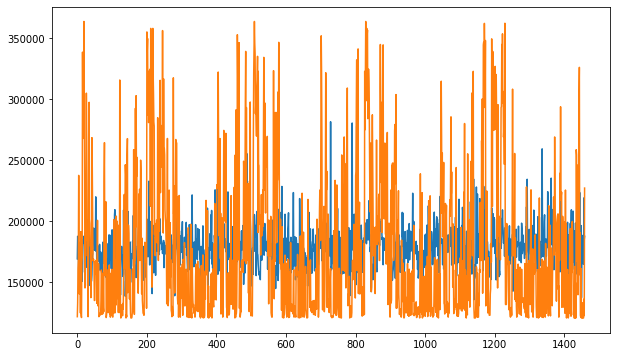

<IPython.core.display.Javascript object>

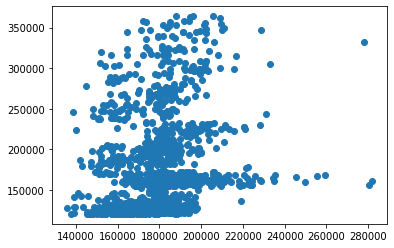

In [204]:
plt.figure(figsize=(10,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.show()
plt.scatter(y_test,y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
pd.read_csv('sample_submission.csv')

In [135]:
# Trying Hyper parameter optimization

In [136]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
n_estimators =[100,200,500,900]
booster=['gbtree', 'gblinear']
learning_rate=[0.05,0.1, 0.15,0.20, 0.25, 0.30]
min_child_weight=[1,2,3,4,5]
base_score =[0.25, 0.50, 0.75, 1.00]
Hyper_parameters = {'n_estimators':n_estimators,'booster':booster,'learning_rate':learning_rate,
                   'min_child_weight':min_child_weight,'base_score':base_score}

In [141]:
r_search = RandomizedSearchCV(estimator=Regressor, param_distributions=Hyper_parameters,cv=5,random_state=42,
                             scoring='neg_mean_absolute_error', n_jobs=4)

In [142]:
r_search.fit(X_train_df, Y_train)

C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:34:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRFRegressor(base_score=0.5, colsample_bylevel=1,
                                            colsample_bynode=0.8,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed...
                   iid='deprecated', n_iter=10, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1.0],
                               

In [144]:
r_search.best_estimator_

XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
               max_depth=3, min_child_weight=3, missing=None, n_estimators=500,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [154]:
model = xgboost.XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
               max_depth=3, min_child_weight=3, missing=None, n_estimators=500,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [155]:
model.fit(X_train_df, Y_train)

C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.8, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [205]:
y_pred = model.predict(final_test_df)

In [206]:
metrics.r2_score(y_test, y_pred)

-19.925340887736677

In [207]:
df_sub=pd.concat([submission['Id'],pd.DataFrame(y_pred)], axis=1)
df_sub.columns=['Id', 'SalePrice']
sample_sub=df_sub.to_csv('sample_submission.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

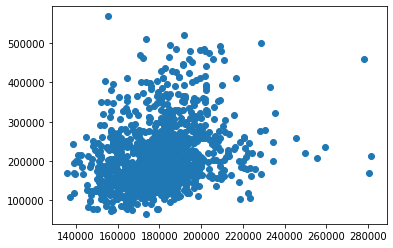

In [208]:
plt.scatter(y_test, y_pred)